# Data Kung Fu with Pandas

![Title Image](img/po.png)

### Quick Note
If you are absolutely brand new to Python, check out the sugggested links on the PyLadies meetup details:<br>
https://www.python.org/about/gettingstarted/ <br>
https://www.codecademy.com/learn/python

You'll still be able to follow along so no worries :)

### Objectives

By the end of this tutorial, you'll be able to:

- install Anaconda
- launch, run, and modify a Jupyter notebook
- use Python and Pandas to analyse a dataset of Hotel Receipts

## Setup Instructions

The follwing instructions assume that you have little to no experience using GitHub or Jupyter. In that case, you are probably viewing this document on [GitHub.com](https://github.com/). That's fine for *viewing* purposes, but if you want to be able to *run* the code in this document, you'll have to do some extra work. See the instructions below:

__Prep your computer:__

1. Install Anaconda (if you haven't already). See: https://www.continuum.io/downloads
1. Download our starter code:
    1. Go to https://github.com/turboquant/kungfu
    2. Click "Download ZIP".
    3. Save and unzip the file (and take note of where you saved it).

__Load our starter code using Jupyter:__

1. Launch Jupyter. There are two ways to do this:
    1. If you're confortable in the terminal, run the command `jupyter notebook`
    2. Otherwise, use `Anaconda Navigator` to launch Jupyter.
2. Using the Jupyter window that opens in your browser, navigate to where you saved & unzipped the starter code.
3. Click on THIS notebook to open it. You should now see this notebook on your own computer screen!

__Begin Programming!__

Congrats! You are now ready to run the code in this notebook! Continue below by reading every English sentence and running every cell of code.

Ok, Let's get started.

## Loading up the tools we'll need.

In [1]:
# Any line after a hash (#) is recognized as a comment in Python.

# Pandas is the "Python Data Analysis Library". We use it for loading data from disk and
# for manipulating and printing data, plus we're loading an additional tool called scatter_matrix
import pandas as pd
from pandas.tools.plotting import scatter_matrix

# matplotlib is used for...you guessed it: plotting!
import matplotlib.pyplot as plt

# This next line is a Jupyter directive. It tells Jupyter that we want our plots to show
# up right below the code that creates them.
%matplotlib inline

Pandas by default will not print every column in our data if there are A LOT of columns.<br> For this notebook, we would prefer that Pandas print all the columns no matter what, so let's tell Pandas our wishes:

In [2]:
pd.set_option('display.max_columns', None)

## Let's read some data!

This data was obtained from https://data.texas.gov
(and trimmed a bit for this tutorial).

In [3]:
raw_dataframe = pd.read_csv("data/mydata.csv")

Nice! We have data. Now let's look at it!

Pandas makes it easy to peek into your data and see what you have. The first step in any data project is to get to know your data.

Let's start by looking at the first 3 rows of data. That's easy to do using the `head()` method on our DataFrame. Let's put a 3 in the parenthesis to limit the rows returned to 3.

In [4]:
raw_dataframe.head(3)

,Month,Year,Taxpayer Number,Taxpayer Name,Taxpayer Address,Taxpayer City,Taxpayer State,Taxpayer Zip,Taxpayer County,Outlet Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Location Room Capacity,Location Tot Room Receipts,Location Taxable Receipts,Taxpayer Geolocation,Location Geolocation
0,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373.0,178,155,(PB 114) TERRY L CARTER,2012 HWY 361 #114,PORT ARANSAS,TX,78373,178.0,1,$6010.00,$6010.00,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 #114\nPORT ARANSAS, TX 78373\n"
1,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373.0,178,156,(PB 205) LARRY OR VICKY MURPHY,2012 HWY 361 # 205,PORT ARANSAS,TX,78373,178.0,1,$9855.00,$9855.00,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 # 205\nPORT ARANSAS, TX 78373\n"
2,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373.0,178,194,(PB101) STEVEN AND MARY MORGAN,2012 HWY 361 #101,PORT ARANSAS,TX,78373,178.0,1,$9425.00,$9425.00,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 #101\nPORT ARANSAS, TX 78373\n"


Looks good at first glance. We'll dig in more later, but first let's ask Pandas to give us info about the datatype of each columns:

In [5]:
raw_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17977 entries, 0 to 17976
Data columns (total 21 columns):
Month                         17977 non-null int64
Year                          17977 non-null int64
Taxpayer Number               17977 non-null int64
Taxpayer Name                 17977 non-null object
Taxpayer Address              17977 non-null object
Taxpayer City                 17977 non-null object
Taxpayer State                17975 non-null object
Taxpayer Zip                  17975 non-null float64
Taxpayer County               17977 non-null int64
Outlet Number                 17977 non-null int64
Location Name                 17977 non-null object
Location Address              17977 non-null object
Location City                 17977 non-null object
Location State                17977 non-null object
Location Zip                  17977 non-null int64
Location County               17975 non-null float64
Location Room Capacity        17977 non-null int64
Location Tot

Most of the stuff above looks correct:
- _Month_ is encoded as an integer, so pandas is correct in identifying the _Month_ column as an integer.
- _Name_, _Address_, _City_, and _State_ are correctly identified as strings (or 'text', which is what pandas means when it says something is an object).
- _County_ is also encoded as an integer, so pandas is correct again.
- ... etc...

There are a few things above that don't look right:
- Why is _Taxpayer Zip_ a floating point number? A floating point is a decimal, like 0.75
- Why is _Location County_ a floating point number?
- _Location Tot Room Receipts_ has a dollar sign in it which is why pandas thinks it's a string instead of a number. Tot is short for Total.
- Ditto for _Location Taxable Receipts_.

## Let's clean our data.

We idenified four issues above, so let's fix each one.<br>
We start by making a copy of our raw dataset:

In [6]:
dataframe = raw_dataframe.copy()

In [7]:
# Convert _Taxpayer Zip_ to an integer.
dataframe['Taxpayer Zip'] = dataframe['Taxpayer Zip'].fillna(0.0).astype(int)

# Convert _Location County_ to an integer.
dataframe['Location County'] = dataframe['Location County'].fillna(0.0).astype(int)

# Convert _Location Tot Room Receipts_ to a float.
# Note the red "\" which is how to tell python to keep reading on the next line 
dataframe['Location Tot Room Receipts'] = \
    dataframe['Location Tot Room Receipts'] \
        .replace('[\$,]', '', regex=True).astype(float, inplace=True)

# Convert _Location Tot Room Receipts_ to a float.
dataframe['Location Taxable Receipts'] = \
    dataframe['Location Taxable Receipts'] \
        .replace('[\$,]', '', regex=True).astype(float, inplace=True)

Again, let's have pandas give us info about what it thinks the datatype of each column is.<br>
It should all look good now (note that we are looking at the `dataframe` object and no longer `raw_dataframe`:

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17977 entries, 0 to 17976
Data columns (total 21 columns):
Month                         17977 non-null int64
Year                          17977 non-null int64
Taxpayer Number               17977 non-null int64
Taxpayer Name                 17977 non-null object
Taxpayer Address              17977 non-null object
Taxpayer City                 17977 non-null object
Taxpayer State                17975 non-null object
Taxpayer Zip                  17977 non-null int64
Taxpayer County               17977 non-null int64
Outlet Number                 17977 non-null int64
Location Name                 17977 non-null object
Location Address              17977 non-null object
Location City                 17977 non-null object
Location State                17977 non-null object
Location Zip                  17977 non-null int64
Location County               17977 non-null int64
Location Room Capacity        17977 non-null int64
Location Tot Roo

Nice! Our datatypes look correct. Next, we'll look at the content of our data.

## Exploratory Data Analysis (EDA)

#### Sanity Check

Let's look at the head again. It should be the same as before, but we'll look again to remind ourselves what it looks like.

In [9]:
dataframe.head(3)

,Month,Year,Taxpayer Number,Taxpayer Name,Taxpayer Address,Taxpayer City,Taxpayer State,Taxpayer Zip,Taxpayer County,Outlet Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Location Room Capacity,Location Tot Room Receipts,Location Taxable Receipts,Taxpayer Geolocation,Location Geolocation
0,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373,178,155,(PB 114) TERRY L CARTER,2012 HWY 361 #114,PORT ARANSAS,TX,78373,178,1,6010.0,6010.0,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 #114\nPORT ARANSAS, TX 78373\n"
1,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373,178,156,(PB 205) LARRY OR VICKY MURPHY,2012 HWY 361 # 205,PORT ARANSAS,TX,78373,178,1,9855.0,9855.0,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 # 205\nPORT ARANSAS, TX 78373\n"
2,7,2015,32009496855,MARCUS C STARKEY,PO BOX 1780,PORT ARANSAS,TX,78373,178,194,(PB101) STEVEN AND MARY MORGAN,2012 HWY 361 #101,PORT ARANSAS,TX,78373,178,1,9425.0,9425.0,"PO BOX 1780\nPORT ARANSAS, TX 78373\n","2012 HWY 361 #101\nPORT ARANSAS, TX 78373\n"


I'm noticing something that might be wrong: Why is 'Location Room Capacity' equal 1 for these rows? Are these hotels with just one room each? Maybe... we'll keep this in mind.

For now let's get an idea about the distribution of the 'Location Room Capacity' column. We'll create a histogram over this column.

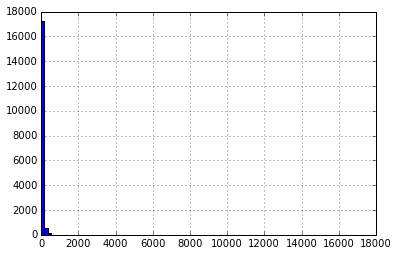

In [10]:
# Hmm, _Location Room Capacity_ looks suspicious
dataframe['Location Room Capacity'].hist(bins=100) 

In [11]:
dataframe['Location Room Capacity'].describe()

count    17977.000000
mean        53.730100
std        206.196703
min          1.000000
25%          1.000000
50%         29.000000
75%         73.000000
max      17211.000000
Name: Location Room Capacity, dtype: float64

Hmm, not very informative. That's okay, let's try again, but this time we'll only look at rows where the 'Location Room Capacity' is less than 50. This will make us sort-of "zoom in" on the part that's most interesting:

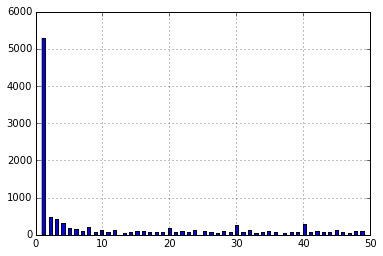

In [12]:
rows_of_interest = (dataframe['Location Room Capacity'] < 50)
dataframe[rows_of_interest]['Location Room Capacity'].hist(bins=100)

What is that spike at 'Location Room Capacity' == 1? Let's find out how many of these items (rows) we got.

In [13]:
# How many of these suspicious observations do we have?
(dataframe['Location Room Capacity'] == 1).sum()

5276

... yep, that spike is at 'Location Room Capacity' == 1.

There seems to be way too many hotels with 'Location Room Capacity' == 1. It's possible that whoever created this dataset is filling all "unknown values" with the value 1. It's too soon to tell...

![Title Image](img/shifu.png)

In [14]:
# IGNORE THIS FOR NOW!
# Keep commented out.
#
# print("Orig size:", dataframe.shape)
# dataframe = dataframe[dataframe['Location Room Capacity'] > 1]
# print("New size:", dataframe.shape)

### Visualization (histograms and scatterplots)
Let's get to know our data better with some charts

#### Number of States Represented
Let's see what states are represented in this data. (It should only be Texas, but let's check.)

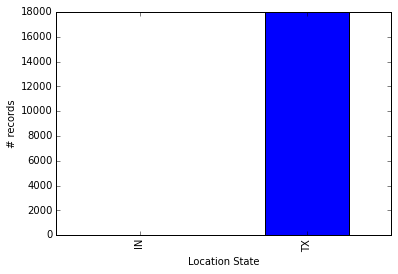

In [15]:
agg = dataframe.groupby('Location State').apply(len)
agg.plot(kind='bar').set_ylabel('# records')

... seems have some non-Texas stuff in here! Let's get a textual printout for more detail.

In [16]:
dataframe['Location State'].value_counts()

TX    17975
IN        2
Name: Location State, dtype: int64

... Indiana... what's up with that? Let's keep only the Texas rows. Let's filter them out:

In [17]:
texas_df = dataframe[dataframe['Location State'] == 'TX']

#### Number of Cities Represented
Ok, how many unique cities (Texas only) are represented?

In [18]:
texas_df['Location City'].describe()

count            17975
unique             696
top       PORT ARANSAS
freq              1476
Name: Location City, dtype: object

#### Histogram: Number of unique hotels in each city
Ok, now let's let's do a groupby (think: pivot table) on the 'Location City' and aggregate unique tax ids to get a total count (per city):

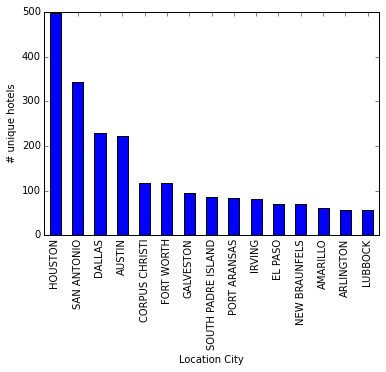

In [19]:
city_counts = texas_df.groupby('Location City')['Taxpayer Number'].nunique()
city_counts.sort_values(axis=0, ascending=False, inplace=True)
top_cities = city_counts > 50
city_counts[top_cities].plot(kind='bar').set_ylabel('# unique hotels');

#### Exploring the numeric columns

In [20]:
# Now let's focus on the numeric columns.
numeric_columns = ['Month', 'Year', 'Outlet Number', 'Location Room Capacity',
                   'Location Tot Room Receipts', 'Location Taxable Receipts']

In [21]:
# Let's see some stats
texas_df[numeric_columns].describe()

,Month,Year,Outlet Number,Location Room Capacity,Location Tot Room Receipts,Location Taxable Receipts
count,17975.000000,17975.0,17975.000000,17975.000000,1.797500e+04,1.797500e+04
mean,7.506926,2015.0,34.492796,53.732851,1.033472e+05,8.925478e+04
std,0.499966,0.0,77.882943,206.208009,3.057721e+05,2.505573e+05
min,7.000000,2015.0,1.000000,1.000000,0.000000e+00,0.000000e+00
25%,7.000000,2015.0,1.000000,1.000000,3.850000e+03,3.398000e+03
50%,8.000000,2015.0,2.000000,29.000000,2.041441e+04,1.558260e+04
75%,8.000000,2015.0,26.000000,73.000000,1.097441e+05,8.907580e+04
max,8.000000,2015.0,598.000000,17211.000000,1.552075e+07,7.142023e+06


#### Pairplot over a few numeric columns-of-interest
A _pairplot_ (also known as a _scatter matrix_) will plot every column vs every other column. It's a quick way to see which pairs of columns are correlated (or not). Let's try a few columns:

/Users/turbo/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


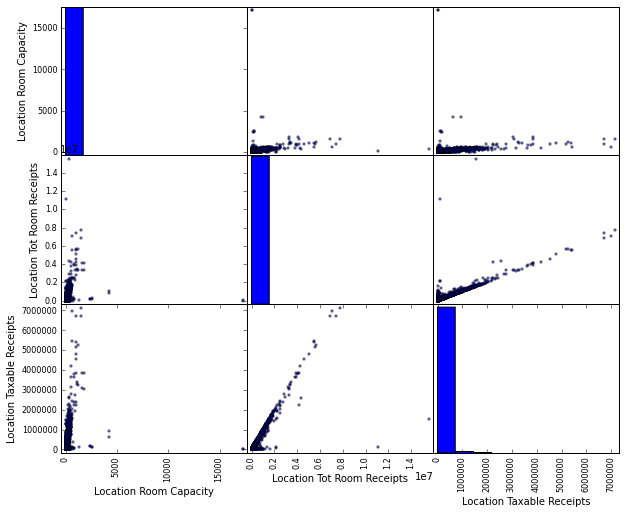

In [22]:
cols_of_interest = ['Location Room Capacity', 'Location Tot Room Receipts',
                    'Location Taxable Receipts']
scatter_matrix(texas_df[cols_of_interest], figsize=(10, 8));

#### Compare two cities: Scatterplot 'Location Room Capacity' vs 'Location Tot Room Receipts' for each city

Ok, let's change thing up a bit. How do different cities compare? Does it seem that Austin and El Paso are different, or are they basically the same? (We'll explore this more further later on, but for now let's just look at the pretty picture and make our best guess.)


/Users/turbo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/turbo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


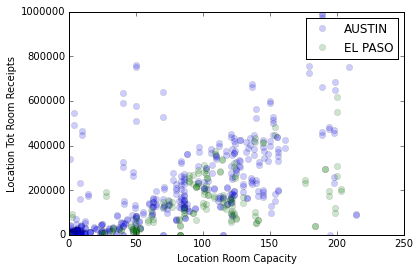

In [23]:
cities_of_interest = ['AUSTIN', 'EL PASO']

# Scatter plot by city.
for city in cities_of_interest:
    city_mask = (texas_df['Location City'] == city)
    size_mask = (texas_df['Location Room Capacity'] < 220)
    plt.plot(texas_df[city_mask][size_mask]['Location Room Capacity'],
             texas_df[city_mask][size_mask]['Location Tot Room Receipts'],
             linestyle='',
             marker='o',
             alpha=.2,
             label=city)
plt.xlabel('Location Room Capacity')
plt.ylabel('Location Tot Room Receipts')
plt.legend(numpoints=1)

Humm... I don't know about you, but I didn't expect this! There are two things here that surprised me:
1. The trend-line is not very strong. There is a general upward trend, but it is riddled with noise.
2. These cities do not differ much! Average income per room is roughly the same in each city.

The takeaway (this is usually the takeaway), is two-fold:
1. Your data is probably not as clean asd pretty as you'd like, and
2. Often your assumptions about what you will find are just plain off.

That's why it is so important to dive into the data.

#### Histogram of every numeric column
Ok, let's look at those numeric columns again. This is another graph that you should make for every dataset you get. It is often useful. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115391fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115c7e510>]], dtype=object)

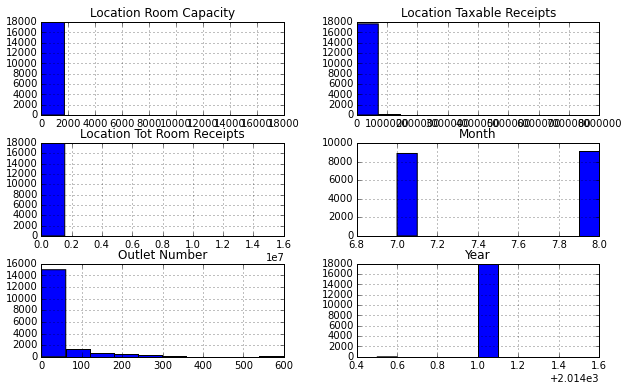

In [24]:
# Here's another one-liner:
texas_df[numeric_columns].hist(bins=10, figsize=(10, 6))

#### Years and Months, what do we have of each?

In [25]:
texas_df['Year'].value_counts()

2015    17975
Name: Year, dtype: int64

So out data is from 2015, good. We only have two months (July and August) though, see:

In [26]:
texas_df['Month'].value_counts()

8    9112
7    8863
Name: Month, dtype: int64

#### Histogram: Avg 'room capacity' per city (top cities only)
So how does capacity differ by city?

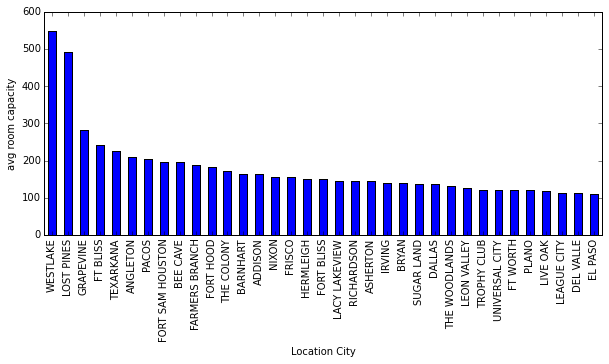

In [27]:
city_counts = texas_df.groupby('Location City')['Location Room Capacity'].mean()
city_counts.sort_values(axis=0, ascending=False, inplace=True)
city_counts[city_counts>110].plot(kind='bar', figsize=(10, 4)).set_ylabel('avg room capacity')

#### Histogram: Avg income per room per night per city (top cities only)
...and average income per city?

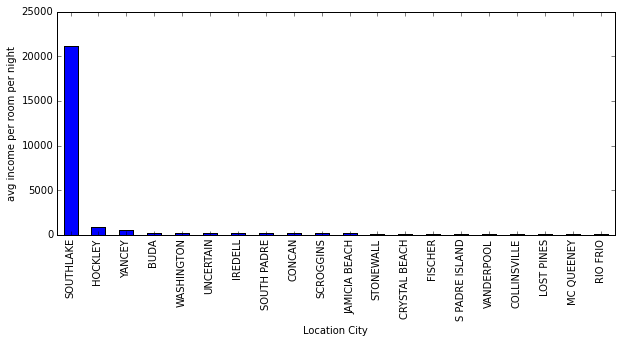

In [28]:
num_days = 31 + 31  # <-- both July and August each have 31 days in them.

cities = texas_df.groupby('Location City')
city_receipts = cities['Location Tot Room Receipts'].sum()
city_rooms = cities['Location Room Capacity'].sum()
city_income_per_room_per_night = city_receipts / city_rooms / num_days
city_income_per_room_per_night.sort_values(axis=0, ascending=False, inplace=True)
most_profitable_cities = city_income_per_room_per_night > 100
city_income_per_room_per_night[most_profitable_cities].plot(kind='bar', figsize=(10, 4)) \
    .set_ylabel('avg income per room per night')

#### <b><font color='indianred'>RED ALERT:</b> What's up with SOUTHLAKE?

In [29]:
texas_df[texas_df['Location City'] == 'SOUTHLAKE']

,Month,Year,Taxpayer Number,Taxpayer Name,Taxpayer Address,Taxpayer City,Taxpayer State,Taxpayer Zip,Taxpayer County,Outlet Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Location Room Capacity,Location Tot Room Receipts,Location Taxable Receipts,Taxpayer Geolocation,Location Geolocation
9915,8,2015,32040911136,"H & C SOUTHLAKE HILTON, LLC",4119 MASSARD RD,FORT SMITH,AR,72903,0,1,"H & C SOUTHLAKE HILTON, LLC",1400 PLAZA PL,SOUTHLAKE,TX,76092,220,1,1308202.16,1263473.16,"4119 MASSARD RD\nFORT SMITH, AR 72903\n(35.341...","1400 PLAZA PL\nSOUTHLAKE, TX 76092\n(32.94558,..."
17005,7,2015,32040911136,"H & C SOUTHLAKE HILTON, LLC",4119 MASSARD RD,FORT SMITH,AR,72903,0,1,"H & C SOUTHLAKE HILTON, LLC",1400 PLAZA PL,SOUTHLAKE,TX,76092,220,1,1310892.31,1284664.81,"4119 MASSARD RD\nFORT SMITH, AR 72903\n(35.341...","1400 PLAZA PL\nSOUTHLAKE, TX 76092\n(32.94558,..."


Wait. Is this bad data?<br>

Our data says that this hotel in Southlake has only one room. Let's look into whether or not that's true. Here's the website for that hotel in Southlake:
http://www3.hilton.com/en/hotels/texas/hilton-dallas-southlake-town-square-DFWSLHF/index.html

Ok... that hotel above definitely has more than one room! Remember how we considered dropping rows where 'Location Room Capacity' == 1? Well, I think it's time to pull the trigger on that decision. 

__HINT: Look for Master Shifu. <br>There is code in one of the cells above that does this, but it is commented out--all you need to do is uncomment that code and run all the cells from there to here again. notice what changes as you re-run each cell.__

#### Is there much of a difference between the month of July and the month of August?
Ok, Let's compare average income between months and per city:

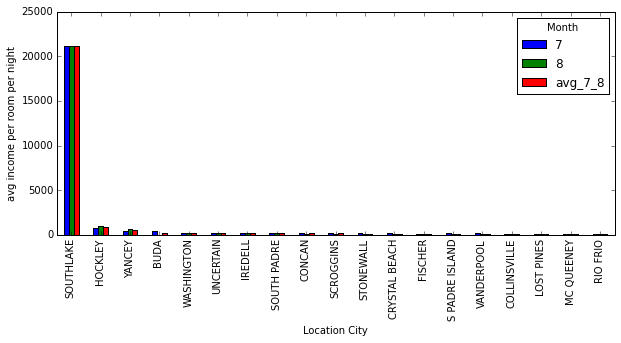

In [30]:
# How does the specific month affect the avg income per room per night?

cities = texas_df.groupby(['Location City', 'Month'])
city_receipts = cities['Location Tot Room Receipts'].sum()
city_rooms = cities['Location Room Capacity'].sum()
city_income_per_room_per_night = city_receipts / city_rooms / num_days
city_income_per_room_per_night = city_income_per_room_per_night.unstack()
city_income_per_room_per_night['avg_7_8'] = (city_income_per_room_per_night[7] + \
                                             city_income_per_room_per_night[8]) / 2
city_income_per_room_per_night.sort_values(by='avg_7_8', ascending=False, inplace=True)
most_profitable_cities = city_income_per_room_per_night['avg_7_8'] > 100
city_income_per_room_per_night[most_profitable_cities].plot(kind='bar', figsize=(10, 4)) \
    .set_ylabel('avg income per room per night')

In [31]:
# Seems July (7) was a better month for the top cities than August (8). Let's see if this
# was overall true for the entire dataset.
print('July Avg:', city_income_per_room_per_night[7].mean())
print('Aug Avg: ', city_income_per_room_per_night[8].mean())

('July Avg:', 59.724957555501405)
('Aug Avg: ', 55.023537498310844)


####  _Enough for today. Break time :)_